In [ ]:
# Setup the Code

## imports

In [60]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy

from pandas import DataFrame

from sklearn import datasets
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDClassifier

#matplotlib.style.use('ggplot')

## Constants

In [68]:
RANDOM_SEED = 666
TEST_FRACTION = 0.25
COLORS = 'r m b'.split()

# Prepare the Data

## Load and Inspect

In [46]:
iris = datasets.load_iris()

In [47]:
print(iris.keys())

dict_keys(['DESCR', 'data', 'target', 'feature_names', 'target_names'])


In [48]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [49]:
frame = DataFrame(iris.data, columns=iris.feature_names)
frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


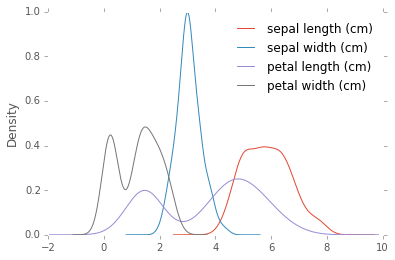

In [50]:
figure = plt.figure()
axe = figure.gca()
axes = frame.plot(kind='kde', ax=axe)

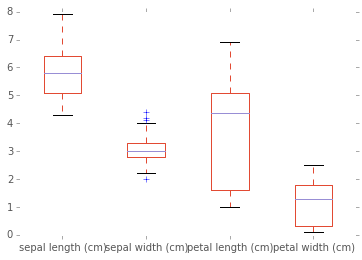

In [51]:
fig = plt.figure()
axe = fig.gca()
axe = frame.plot(kind='box', ax=axe)

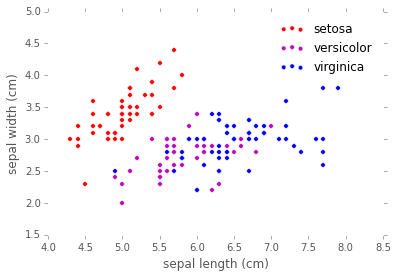

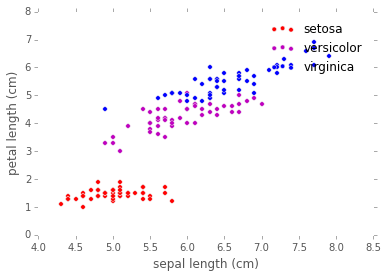

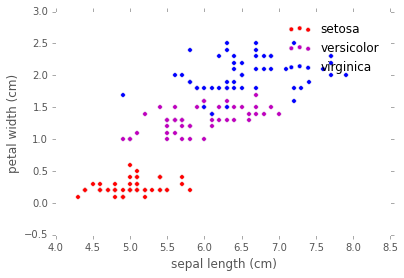

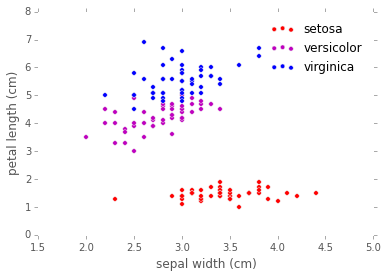

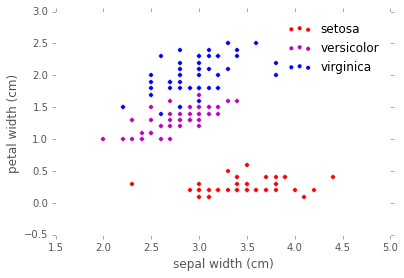

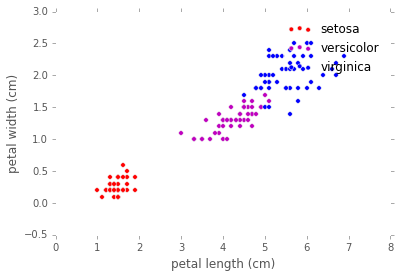

In [52]:
colors = 'r m b'.split()
for x_feature in range(3):
    for y_feature in range(x_feature+1, 4):
        fig = plt.figure()
        axe = fig.gca()
        for target in range(len(colors)):
            data = frame[iris.target == target]
            label = iris.target_names[target]
            color = colors[target]
            x_data = iris.feature_names[x_feature]
            y_data = iris.feature_names[y_feature]
            axe = data.plot(x=x_data, y=y_data, 
                            kind='scatter', 
                            ax=axe, 
                            label=label,
                            facecolor=color)

It looks like `setosa` is always more easily separable from the other two types, and that petal width and length might actually be the easiest to separate out.

# Pre-Processing the Data

In [ ]:
class XYData(object):
    def __init__(self, x_name, y_name):
        self.x_name = x_name
        
        return
# end XYData

# Separate the Data

In [53]:
x_train = {}
x_test = {}
y_train = {}
y_test = {}
sepal_data = frame[iris.feature_names[:2]]
scaler = preprocessing.StandardScaler().fit(sepal_data)
xtrain, xtest, ytrain, ytest = train_test_split(sepal_data, 
                                                   iris.target,
                                                   test_size=TEST_FRACTION,
                                                   random_state=RANDOM_SEED)
xtrain, xtest = scaler.transform(xtrain), scaler.transform(xtest)

# Fit The Model

In [58]:
classifier = SGDClassifier()
classifier = classifier.fit(xtrain, ytrain)

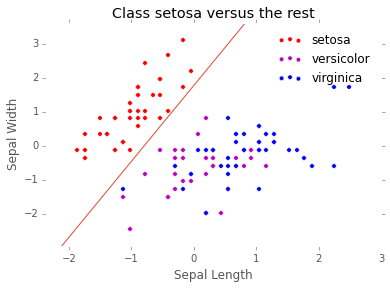

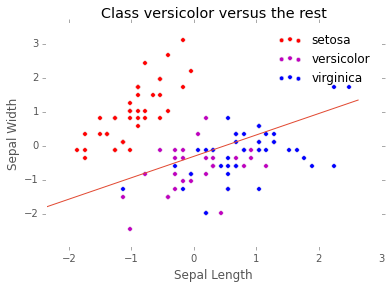

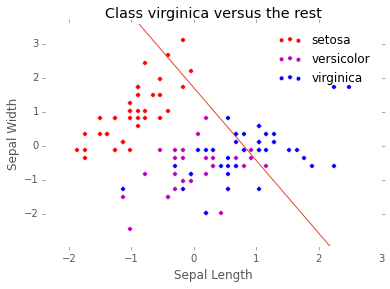

In [70]:
def plot_fit(x_train, y_train, classifier):
    x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
    y_min, y_max = x_train[:, 1].min() - .5, x_train[:,1].max() + .5
    xs = numpy.arange(x_min, x_max, 0.5)
    for plot in range(len(iris.target_names)):
        figure = plt.figure()
        class_name = iris.target_names[plot]
        axe = figure.gca()
        axe.set_title('Class {0} versus the rest'.format(class_name))
        axe.set_xlabel('Sepal Length')
        axe.set_ylabel('Sepal Width')
        axe.set_xlim(x_min, x_max)
        axe.set_ylim(y_min, y_max)
        for index, classification in enumerate(iris.target_names):
            this_train = x_train[y_train == index]
            axe.scatter(this_train[:, 0], this_train[:, 1], c=COLORS[index], label=classification)
        ys = (-classifier.intercept_[plot] - xs * classifier.coef_[plot, 0]) / classifier.coef_[plot, 1]
        axe.legend()
        axe.plot(xs, ys)
    return
plot_fit(xtrain, ytrain, classifier)